In [564]:
import perceval as pcvl
import perceval.components.unitary_components as comp
import math
from perceval.components.unitary_components import PS, BS, PERM
from perceval import Processor, PostSelect, Port, Circuit

In [565]:
bs = pcvl.BasicState("|0,1>")
print(f"Number of photons: {bs.n}")
print(f"Number of modes: {bs.m}")
print(f"Photons in mode 0: {bs[0]}")
print(f"Photons in mode 1: {bs[1]}")

Number of photons: 1
Number of modes: 2
Photons in mode 0: 0
Photons in mode 1: 1


In [566]:
state = pcvl.BasicState([0, 1]) * pcvl.BasicState([2, 3])
print(state)

|0,1,2,3>


In [567]:
st1 = pcvl.StateVector("|1,0>")
st2 = pcvl.StateVector("|0,1>")
st3 = st1 + st2
print(st3)
print(f"First state: {st3[0]}")
print(f"Second state: {st3[1]}")

sqrt(2)/2*|1,0>+sqrt(2)/2*|0,1>
First state: |0,1>
Second state: |1,0>


In [568]:
# sv = pcvl.StateVector("|0,1,1>") + pcvl.StateVector("|1,1,0>")
# map_measure_sv = sv.measure()
# for s, (p, sv) in map_measure_sv.items():
# print(s, p, sv)

In [569]:
alpha = pcvl.P("alpha")
alpha2 = pcvl.P("phi", min_v=0, max_v=2 * math.pi, periodic=True)

In [570]:
c1 = pcvl.BS(theta=alpha)

In [571]:
c2 = pcvl.BS(theta=alpha) // pcvl.PS(pcvl.P("phi")) // pcvl.BS(theta=alpha)

In [572]:
alpha.set_value(math.pi / 2)
alpha.defined

True

In [573]:
pcvl.pdisplay(c1.compute_unitary(use_symbolic=False))

<IPython.core.display.Math object>

In [574]:
phi1 = pcvl.P("phi1")
phi2 = pcvl.P("phi2")

In [575]:
mzi = pcvl.Circuit(m=4, name="mzi")
mzi.add(0, comp.PERM([1, 0]))
mzi.add((1, 2), comp.BS(phi1))
mzi.add(0, comp.PERM([1, 0]))

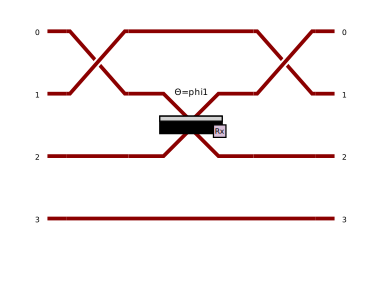

In [576]:
pcvl.pdisplay(mzi)

In [577]:
pcvl.pdisplay(mzi.compute_unitary(use_symbolic=True))

<IPython.core.display.Math object>

In [578]:
from perceval.utils import Encoding

In [579]:
phi1 = pcvl.P("phi1")
theta = pcvl.P("theta")
theta2 = pcvl.P("theta2")
theta3 = pcvl.P("theta3")

In [580]:
phi1.set_value(math.pi)
theta.set_value(2 * math.pi * 54.74 / 180)
theta2.set_value(2 * math.pi * -54.74 / 180)
theta3.set_value(2 * math.pi * 17.63 / 180)

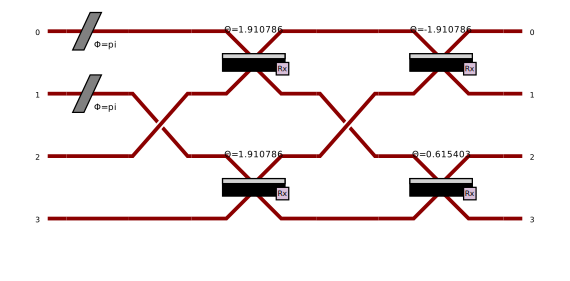

In [581]:
mzi = pcvl.Circuit(m=4, name="mzi")
mzi.add(0, comp.PS(phi1)).add(1, comp.PS(phi1)).add(0, comp.PERM([0, 2, 1, 3])).add(
    (0, 1), comp.BS(theta)
).add((2, 3), comp.BS(theta)).add(0, comp.PERM([0, 2, 1, 3])).add(
    (0, 1), comp.BS(theta2)
).add(
    (2, 3), comp.BS(theta3)
)
pcvl.pdisplay(mzi)

In [582]:
pcvl.pdisplay(mzi.compute_unitary(use_symbolic=False))

<IPython.core.display.Math object>

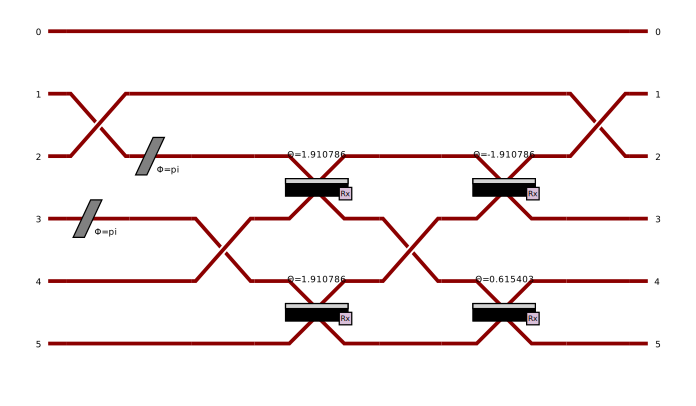

In [583]:
c1 = (
    Circuit(6, name="Heralded CZ")
    .add(1, PERM([1, 0]))
    .add(2, mzi, merge=True)
    .add(1, PERM([1, 0]))
)

p1 = Processor("SLOS", c1)
p1.add_herald(4, 1).add_herald(5, 1)
pcvl.pdisplay(c1)

In [584]:
# First,we convert the CZ to a CNOT
proc = Processor("SLOS", 4)
proc.add(2, pcvl.BS.H())
proc.add(0, p1)
proc.add(2, pcvl.BS.H())

states = {
    pcvl.BasicState([1, 0, 1, 0]): "00",
    pcvl.BasicState([1, 0, 0, 1]): "01",
    pcvl.BasicState([0, 1, 1, 0]): "10",
    pcvl.BasicState([0, 1, 0, 1]): "11",
}

ca = pcvl.algorithm.Analyzer(proc, states)

truth_table = {"00": "00", "01": "01", "10": "11", "11": "10"}
ca.compute(expected=truth_table)

pcvl.pdisplay(ca)
print(f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")

,00,01,10,11
00,1,0,0,0
01,0,1,0,0
10,0,0,0,1
11,0,0,1,0


performance = 0.07406604842851178, fidelity = 0.9999999915267557


In [585]:
phi1.reset()
phi2.reset()
theta.reset()
theta2.reset()
theta3.reset()

In [586]:
phis = [pcvl.P("Phi" + str(i)) for i in range(0, 6)]
thetas = [pcvl.P("Theta" + str(i)) for i in range(0, 9)]

In [587]:
import random

In [588]:
def set_phis(phis, values=None):
    if not values:
        phis = [phis[i].set_value(random.random() * 2 * math.pi) for i in range(6)]
    else:
        phis = [phis[i].set_value(values[i]) for i in range(6)]


def set_thetas(thetas, values=None):
    if not values:
        thetas = [thetas[i].set_value(random.random() * 2 * math.pi) for i in range(9)]
    else:
        thetas = [thetas[i].set_value(values[i]) for i in range(9)]

In [589]:
mzi = pcvl.Circuit(m=6, name="CCZ6")

In [590]:
for i in range(len(phis)):
    mzi.add(i, comp.PS(phis[i]))

In [591]:
mzi.add((0, 1), comp.BS(thetas[0]))
mzi.add((2, 3), comp.BS(thetas[1]))
mzi.add((4, 5), comp.BS(thetas[2]))

In [592]:
mzi.add((1, 2), comp.BS(thetas[3]))
mzi.add((3, 4), comp.BS(thetas[4]))

In [593]:
mzi.add(0, comp.PERM([0, 1, 3, 2]))
mzi.add((1, 2), comp.BS(thetas[5]))
mzi.add((3, 4), comp.BS(thetas[6]))
mzi.add(0, comp.PERM([0, 1, 3, 2]))

In [594]:
mzi.add(0, comp.PERM([0, 2, 1, 3, 5, 4]))
mzi.add((0, 1), comp.BS(thetas[7]))
mzi.add((3, 4), comp.BS(thetas[8]))
mzi.add(0, comp.PERM([0, 2, 1, 3, 5, 4]))

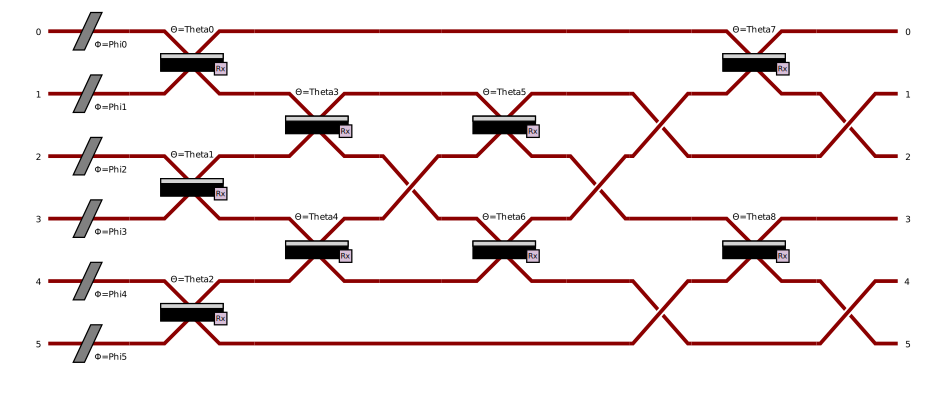

In [595]:
pcvl.pdisplay(mzi)

In [596]:
pcvl.pdisplay(mzi.compute_unitary(use_symbolic=True))

<IPython.core.display.Math object>

In [597]:
c1 = Circuit(9, name="CCZ")
c1.add(5, PERM([1, 0]))
c1.add(3, PERM([1, 0]))
c1.add(4, PERM([1, 0]))

c1.add(1, PERM([1, 0]))
c1.add(2, PERM([1, 0]))
c1.add(3, PERM([1, 0]))
c1.add(3, mzi, merge=True)
c1.add(5, PERM([1, 0]))
c1.add(3, PERM([1, 0]))
c1.add(4, PERM([1, 0]))

c1.add(1, PERM([1, 0]))
c1.add(2, PERM([1, 0]))
c1.add(3, PERM([1, 0]))

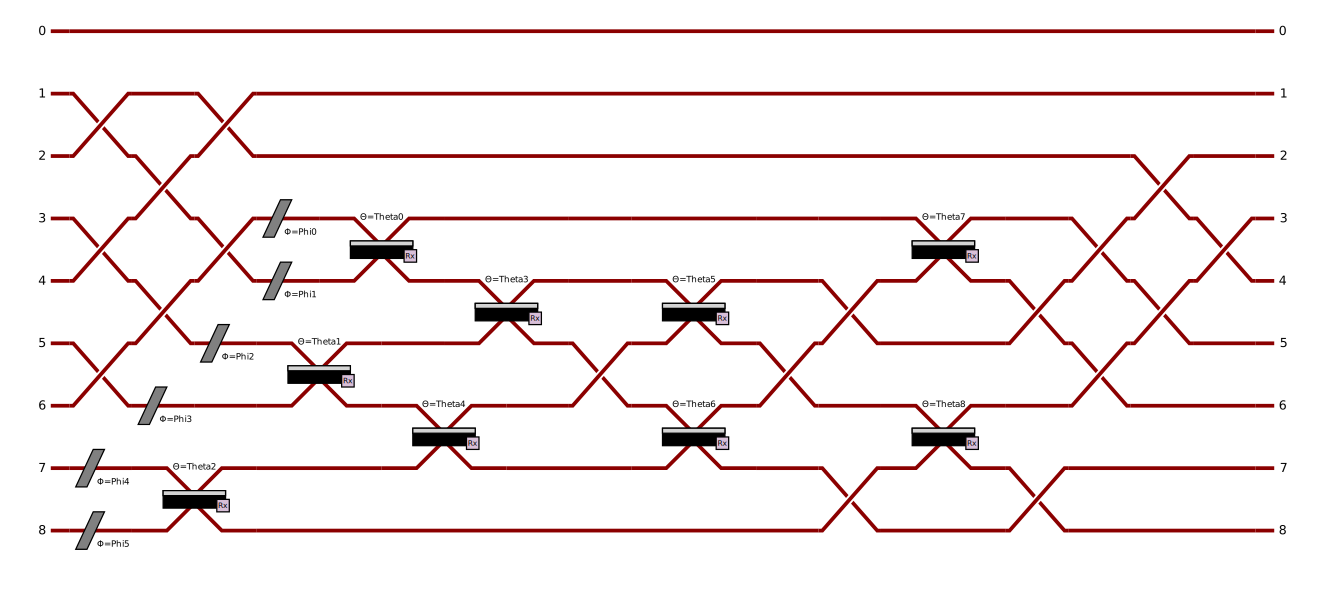

In [598]:
pcvl.pdisplay(c1)
# 1 - 4
# 3 - 5
# 5 - 6

In [599]:
p1 = Processor("SLOS", c1)
p1.set_postselection(PostSelect("[0,1]==1 & [2,3]==1 & [4,5]==1"))
p1.add_herald(6, 0)
p1.add_herald(7, 0)
p1.add_herald(8, 0)

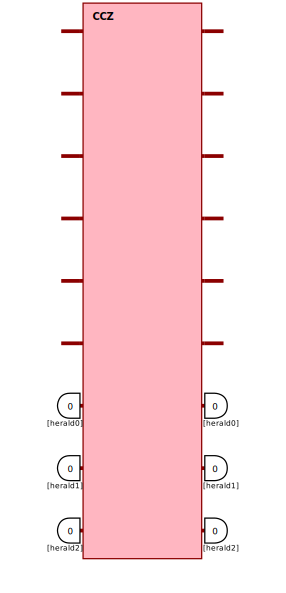

In [600]:
pcvl.pdisplay(p1)

In [601]:
set_phis(phis)
set_thetas(thetas)
proc = Processor("SLOS")
proc.add(4, pcvl.BS.H())
proc.add(0, p1)
proc.add(4, pcvl.BS.H())


states = {
    pcvl.BasicState([1, 0, 1, 0, 1, 0]): "000",
    pcvl.BasicState([1, 0, 1, 0, 0, 1]): "001",
    pcvl.BasicState([1, 0, 0, 1, 1, 0]): "010",
    pcvl.BasicState([1, 0, 0, 1, 0, 1]): "011",
    pcvl.BasicState([0, 1, 1, 0, 1, 0]): "100",
    pcvl.BasicState([0, 1, 1, 0, 0, 1]): "101",
    pcvl.BasicState([0, 1, 0, 1, 1, 0]): "110",
    pcvl.BasicState([0, 1, 0, 1, 0, 1]): "111",
}

ca = pcvl.algorithm.Analyzer(proc, states)

truth_table = {
    "000": "000",
    "001": "001",
    "010": "010",
    "011": "011",
    "100": "100",
    "101": "101",
    "110": "111",
    "111": "110",
}
ca.compute(expected=truth_table)

pcvl.pdisplay(ca)
print(f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")

,000,001,010,011,100,101,110,111
000,0.096486,0.096486,0.403514,0.403514,0,0,0,0
001,0.096486,0.096486,0.403514,0.403514,0,0,0,0
010,0.047995,0.047995,0.452005,0.452005,0,0,0,0
011,0.047995,0.047995,0.452005,0.452005,0,0,0,0
100,0,0,0,0,0.48943,0.48943,0.01057,0.01057
101,0,0,0,0,0.48943,0.48943,0.01057,0.01057
110,0,0,0,0,0.175174,0.175174,0.324826,0.324826
111,0,0,0,0,0.175174,0.175174,0.324826,0.324826


performance = 0.011392724810356143, fidelity = 0.3406869230051759
